In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob

In [20]:
fox_news=pd.read_csv("FOX_Cleaned.csv",encoding = 'unicode_escape')

In [21]:
fox_news

,title,description,link,publish_date
0,Trump threatens 'automatic 10 years in prison'...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/trump-threate...,"Sun, 12 Jul 2020 13:28:19 GMT"
1,DeVos vows to have schools open in fall: 'Kids...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/devos-vows-to...,"Sun, 12 Jul 2020 13:18:52 GMT"
2,Val Demings' police background could complicat...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/val-demings-p...,"Sun, 12 Jul 2020 10:40:44 GMT"
3,Louisville mayor upstaged by protesters at new...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/louisville-ma...,"Sun, 12 Jul 2020 10:17:13 GMT"
4,Trump administration announces 25 percent tari...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/trump-admin-2...,"Sun, 12 Jul 2020 00:53:36 GMT"
5,UN Security Council passes resolution authoriz...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/un-security-c...,"Sun, 12 Jul 2020 00:40:14 GMT"
6,"Robert Mueller defends Stone conviction, Russi...","<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/robert-muelle...,"Sun, 12 Jul 2020 00:35:16 GMT"
7,Rep. Jordan hopes Durham investigation can be ...,"<div><div style=""left: 0; width: 100%; height:...",http://video.foxnews.com/v/6171055810001/,"Sun, 12 Jul 2020 00:00:00 GMT"
8,Mercedes Schlapp on shrinking Democrat voter r...,"<div><div style=""left: 0; width: 100%; height:...",http://video.foxnews.com/v/6171049620001/,"Sun, 12 Jul 2020 00:00:00 GMT"
9,Giuliani on Democrats pushing for Trump's tax ...,"<div><div style=""left: 0; width: 100%; height:...",http://video.foxnews.com/v/6171057210001/,"Sun, 12 Jul 2020 00:00:00 GMT"


In [22]:
fox_news.columns

Index(['title', 'description', 'link', 'publish_date'], dtype='object')

In [23]:
df = pd.DataFrame(fox_news)

In [24]:
df['title'] = df['title'].astype(str)

In [25]:
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [26]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['title'][8]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"mercedes schlapp shrinking democrat voter registration, trump's immigration executive order, gop convention"

In [27]:
st = PorterStemmer()
df['title'] = df['title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['title'][2]

"val demings' polic background could complic biden vp chanc"

In [28]:
def senti(x):
    return TextBlob(x).sentiment

def polarity(x):
    return TextBlob(x).sentiment[0]

df['polarity'] = df['title'].apply(polarity)
 
df['senti_score'] = df['title'].apply(senti)
 
df.senti_score.head()
df.head(10)

,title,description,link,publish_date,polarity,senti_score
0,trump threaten 'automat 10 year prison' anyon ...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/trump-threate...,"Sun, 12 Jul 2020 13:28:19 GMT",0.0000,"(0.0, 0.0)"
1,devo vow school open fall: 'kid got get back s...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/devos-vows-to...,"Sun, 12 Jul 2020 13:18:52 GMT",0.0000,"(0.0, 0.25)"
2,val demings' polic background could complic bi...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/val-demings-p...,"Sun, 12 Jul 2020 10:40:44 GMT",0.0000,"(0.0, 0.0)"
3,louisvil mayor upstag protest news conference:...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/louisville-ma...,"Sun, 12 Jul 2020 10:17:13 GMT",0.0000,"(0.0, 0.0)"
4,trump administr announc 25 percent tariff $1.3...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/trump-admin-2...,"Sun, 12 Jul 2020 00:53:36 GMT",0.3500,"(0.35, 0.30000000000000004)"
5,un secur council pass resolut author cross-bor...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/un-security-c...,"Sun, 12 Jul 2020 00:40:14 GMT",0.0000,"(0.0, 0.0)"
6,"robert mueller defend stone conviction, russia...","<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/robert-muelle...,"Sun, 12 Jul 2020 00:35:16 GMT",-0.0625,"(-0.0625, 0.375)"
7,rep. jordan hope durham investig done elect,"<div><div style=""left: 0; width: 100%; height:...",http://video.foxnews.com/v/6171055810001/,"Sun, 12 Jul 2020 00:00:00 GMT",0.8000,"(0.8, 0.9)"
8,merced schlapp shrink democrat voter registrat...,"<div><div style=""left: 0; width: 100%; height:...",http://video.foxnews.com/v/6171049620001/,"Sun, 12 Jul 2020 00:00:00 GMT",0.0000,"(0.0, 0.0)"
9,"giuliani democrat push trump' tax returns, esc...","<div><div style=""left: 0; width: 100%; height:...",http://video.foxnews.com/v/6171057210001/,"Sun, 12 Jul 2020 00:00:00 GMT",0.0000,"(0.0, 0.0)"


In [29]:
df.shape

(25, 6)

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    return analyser.polarity_scores(sentence)['compound']

results = []

df['Compound'] = df['title'].apply(sentiment_analyzer_scores)
 
df.head()

,title,description,link,publish_date,polarity,senti_score,Compound
0,trump threaten 'automat 10 year prison' anyon ...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/trump-threate...,"Sun, 12 Jul 2020 13:28:19 GMT",0.00,"(0.0, 0.0)",-0.8555
1,devo vow school open fall: 'kid got get back s...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/devos-vows-to...,"Sun, 12 Jul 2020 13:18:52 GMT",0.00,"(0.0, 0.25)",0.0000
2,val demings' polic background could complic bi...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/val-demings-p...,"Sun, 12 Jul 2020 10:40:44 GMT",0.00,"(0.0, 0.0)",0.0000
3,louisvil mayor upstag protest news conference:...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/louisville-ma...,"Sun, 12 Jul 2020 10:17:13 GMT",0.00,"(0.0, 0.0)",-0.2500
4,trump administr announc 25 percent tariff $1.3...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/trump-admin-2...,"Sun, 12 Jul 2020 00:53:36 GMT",0.35,"(0.35, 0.30000000000000004)",0.4404


In [14]:
df['score_sentiment'] = "Neutral"
df.loc[df['Compound'] > 0.2, 'score_sentiment'] = "Positive"
df.loc[df['Compound'] < -0.2, 'score_sentiment'] = "Negative"


df.head(20)


,title,description,link,publish_date,polarity,senti_score,Compound,score_sentiment
0,nan,NaN,NaN,NaN,0.0000,"(0.0, 0.0)",0.0000,Neutral
1,trump threaten 'automat 10 year prison' anyon ...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/trump-threate...,"<pubDate>Sun, 12 Jul 2020 13:28:19 GMT</pubDate>",0.0000,"(0.0, 0.0)",-0.8555,Negative
2,nan,NaN,NaN,NaN,0.0000,"(0.0, 0.0)",0.0000,Neutral
3,devo vow school open fall: 'kid got get back s...,"<div><img src=""https://cf-images.us-east-1.pro...",https://www.foxnews.com/politics/devos-vows-to...,"<pubDate>Sun, 12 Jul 2020 13:18:52 GMT</pubDate>",0.0000,"(0.0, 0.25)",0.0000,Neutral
4,nan,NaN,NaN,NaN,0.0000,"(0.0, 0.0)",0.0000,Neutral
5,val demings' polic background could complic bi...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/val-demings-p...,"<pubDate>Sun, 12 Jul 2020 10:40:44 GMT</pubDate>",0.0000,"(0.0, 0.0)",0.0000,Neutral
6,nan,NaN,NaN,NaN,0.0000,"(0.0, 0.0)",0.0000,Neutral
7,louisvil mayor upstag protest news conference:...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/louisville-ma...,"<pubDate>Sun, 12 Jul 2020 10:17:13 GMT</pubDate>",0.0000,"(0.0, 0.0)",-0.2500,Negative
8,nan,NaN,NaN,NaN,0.0000,"(0.0, 0.0)",0.0000,Neutral
9,trump administr announc 25 percent tariff $1.3...,"<div><img src=""https://static.foxnews.com/foxn...",https://www.foxnews.com/politics/trump-admin-2...,"<pubDate>Sun, 12 Jul 2020 00:53:36 GMT</pubDate>",0.3500,"(0.35, 0.30000000000000004)",0.4404,Positive


In [31]:
df.to_csv('fox_title_sentiments.csv', mode='a', encoding='utf-8', index=False)

In [37]:
dataframe=df
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens
filter1= dataframe['score_sentiment']=="Positive"
pos=dataframe[filter1]
pos_lines = pos["title"].tolist()

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)



pos_freq.most_common(20)

KeyError: 'score_sentiment'

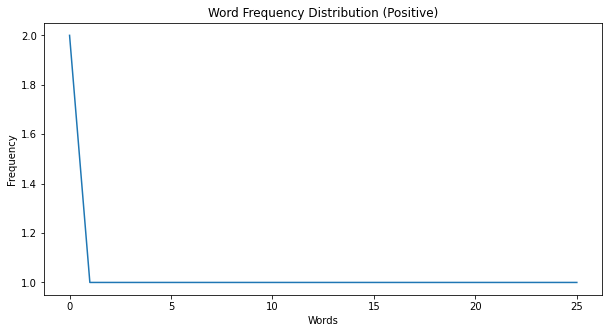

In [36]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [38]:

dataframe2=df

filter2= dataframe2['score_sentiment']=="Negative"
neg=dataframe2[filter2]

neg_lines = neg["title"].tolist()

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

KeyError: 'score_sentiment'

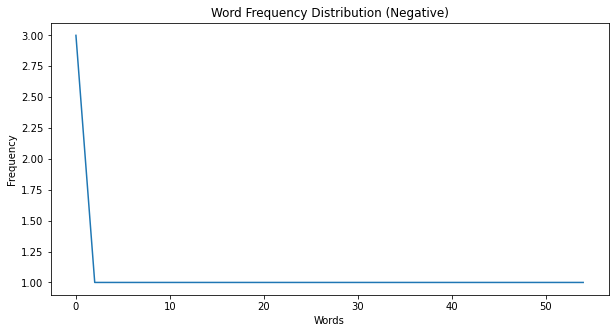

In [18]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()